# **Projeto: Previsão de Intenção de Compra de Clientes em Loja Web**

**Descrição do Projeto**

Neste projeto, nosso objetivo é criar um sistema inteligente para antecipar a intenção de compra dos clientes em um site de e-commerce. Imagine poder prever quais clientes têm maior probabilidade de realizar compras online, com base em suas características e comportamentos passados. Essa capacidade de prever a intenção de compra não só aprimorará a experiência do cliente, mas também permitirá que a empresa direcione seus esforços de marketing de forma mais eficaz.

**Objetivo**

Queremos desenvolver um modelo preditivo capaz de analisar os padrões de comportamento dos clientes e identificar sinais que indicam a propensão deles para realizar compras no site da empresa. Para isso, vamos usar uma base de dados que contém informações detalhadas sobre os clientes, incluindo:

Dados demográficos (idade, renda, etc.)

Informações sobre compras anteriores



# Base de dados:

Year_Birth: Ano de nascimento do cliente.

Education: Nível de escolaridade do cliente.

Marital_Status: Estado civil do cliente.

Income: Renda anual da família do cliente.

Kidhome: Número de crianças na casa do cliente.

Recency: Número de dias desde a última compra do cliente.

Complain: 1 se o cliente reclamou nos últimos 2 anos, 0 caso contrário.

MntWines: Valor gasto em vinhos nos últimos 2 anos.

MntFruits: Valor gasto em frutas nos últimos 2 anos.

MntMeatProducts: Valor gasto em carnes nos últimos 2 anos.

MntFishProducts: Valor gasto em peixes nos últimos 2 anos.

MntSweetProducts: Valor gasto em doces nos últimos 2 anos.

MntGoldProds: Valor gasto em produtos de ouro nos últimos 2 anos.

NumDealsPurchases: Número de compras feitas com desconto

NumStorePurchases: Número de compras feitas diretamente nas lojas.

NumWebVisitsMonth: Número de visitas ao site da empresa no último mês.






**WebPurchases: Número de compras feitas pelo site da empresa.**

# ETAPA 1:

**Preparação dos Dados**

**Exploração e Limpeza:** Analisar e limpar os dados para garantir que estejam prontos para a modelagem.

**Análise:** Construa uma storytelling com gráficos, analisando e retirando insights das informações.

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, KFold, RandomizedSearchCV
from sklearn.metrics import accuracy_score, make_scorer, f1_score, roc_auc_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier


In [8]:
df = pd.read_csv('marketing_campaign-M37.csv', delimiter=';')
df.head(11)

,Year_Birth,Education,Marital_Status,Income,Kidhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumStorePurchases,NumWebVisitsMonth,Complain,WebPurchases
0,1957,Graduation,Single,58138.0,0,58,635,88,546,172,88,88,4,7,0,1
1,1954,Graduation,Single,46344.0,1,38,11,1,6,2,1,6,2,5,0,0
2,1965,Graduation,Together,71613.0,0,26,426,49,127,111,21,42,10,4,0,1
3,1984,Graduation,Together,26646.0,1,26,11,4,20,10,3,5,4,6,0,0
4,1981,PhD,Married,58293.0,1,94,173,43,118,46,27,15,6,5,0,1
5,1967,Master,Together,62513.0,0,16,520,42,98,0,42,14,10,6,0,1
6,1971,Graduation,Divorced,55635.0,0,34,235,65,164,50,49,27,7,6,0,1
7,1985,PhD,Married,33454.0,1,32,76,10,56,3,1,23,4,8,0,1
8,1974,PhD,Together,30351.0,1,19,14,0,24,3,3,2,2,9,0,0
9,1950,PhD,Together,5648.0,1,68,28,0,6,1,1,13,0,20,0,0


In [9]:
df.info()   #verificando o tipo dos dados

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year_Birth         2240 non-null   int64  
 1   Education          2240 non-null   object 
 2   Marital_Status     2240 non-null   object 
 3   Income             2216 non-null   float64
 4   Kidhome            2240 non-null   int64  
 5   Recency            2240 non-null   int64  
 6   MntWines           2240 non-null   int64  
 7   MntFruits          2240 non-null   int64  
 8   MntMeatProducts    2240 non-null   int64  
 9   MntFishProducts    2240 non-null   int64  
 10  MntSweetProducts   2240 non-null   int64  
 11  MntGoldProds       2240 non-null   int64  
 12  NumStorePurchases  2240 non-null   int64  
 13  NumWebVisitsMonth  2240 non-null   int64  
 14  Complain           2240 non-null   int64  
 15  WebPurchases       2240 non-null   int64  
dtypes: float64(1), int64(13)

In [10]:
df['Education'].unique()   #verificando erros ortográficos

array(['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'], dtype=object)

In [11]:
df['Education'] = df['Education'].str.replace('2n Cycle', 'Master', regex=False)  #renomeando '2n Cycle' para 'Master' (são o mesmo nivel de graduação)
df['Education'] = df['Education'].str.replace('Graduation', 'Undergraduate', regex=False)  #renomeando 'Graduation' para 'Undergraduate' (gradução bacharel ou tecnologo)


df['Education'].unique()

array(['Undergraduate', 'PhD', 'Master', 'Basic'], dtype=object)

In [12]:
df['Marital_Status'].unique()  #verificando erros ortográficos

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

In [13]:
df['Marital_Status'].value_counts() #verificando a distribuição de cada estado civil

Marital_Status
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64

In [14]:
df['Marital_Status'] = df['Marital_Status'].str.replace('Widow', 'Widowed', regex=False)  #corrigindo o status 'Window' para 'Windowed' (viuvo(a))
df['Marital_Status'] = df['Marital_Status'].str.replace('Alone', 'Single', regex=False)  #renomeando 'Alone' para 'Single' (solteiro(a))
df = df.drop(df[df['Marital_Status'] == 'Absurd'].index)                                 #excluindo 'Absurd' por não se tratar de um estado civil
df = df.drop(df[df['Marital_Status'] == 'YOLO'].index)                                   #excluindo 'YOLO' por não se tratar de um estado civil


df['Marital_Status'].unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widowed'],
      dtype=object)

In [15]:
(df.isnull().sum()/len(df))*100   #verificando a porcentagem de dados nulos

Year_Birth           0.000000
Education            0.000000
Marital_Status       0.000000
Income               1.073345
Kidhome              0.000000
Recency              0.000000
MntWines             0.000000
MntFruits            0.000000
MntMeatProducts      0.000000
MntFishProducts      0.000000
MntSweetProducts     0.000000
MntGoldProds         0.000000
NumStorePurchases    0.000000
NumWebVisitsMonth    0.000000
Complain             0.000000
WebPurchases         0.000000
dtype: float64

In [16]:
df.dropna(subset=['Income'], inplace=True)  #exluindo valores nulos na coluna Income (optei pela exclusão pois a coluna continha apenas 1% de valores nulos)

(df.isnull().sum()/len(df))*100  #verificando a porcetagem de valores nulos após o tratamento

Year_Birth           0.0
Education            0.0
Marital_Status       0.0
Income               0.0
Kidhome              0.0
Recency              0.0
MntWines             0.0
MntFruits            0.0
MntMeatProducts      0.0
MntFishProducts      0.0
MntSweetProducts     0.0
MntGoldProds         0.0
NumStorePurchases    0.0
NumWebVisitsMonth    0.0
Complain             0.0
WebPurchases         0.0
dtype: float64

In [17]:
df.describe()   #verificando outliers

,Year_Birth,Income,Kidhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumStorePurchases,NumWebVisitsMonth,Complain,WebPurchases
count,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000
mean,1968.811031,52232.510850,0.442586,49.050633,305.030741,26.324593,166.970163,37.516275,27.047468,43.822333,5.800181,5.320072,0.009494,0.504069
std,11.982065,25187.455359,0.537052,28.940794,337.611255,39.781794,224.344950,54.558673,41.092454,51.623472,3.253616,2.423445,0.096994,0.500096
min,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1959.000000,35233.500000,0.000000,24.000000,23.750000,1.750000,16.000000,3.000000,1.000000,9.000000,3.000000,3.000000,0.000000,0.000000
50%,1970.000000,51381.500000,0.000000,49.000000,173.500000,8.000000,68.000000,12.000000,8.000000,24.000000,5.000000,6.000000,0.000000,1.000000
75%,1977.000000,68522.000000,1.000000,74.000000,505.500000,33.000000,232.250000,50.000000,33.000000,56.000000,8.000000,7.000000,0.000000,1.000000
max,1996.000000,666666.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,13.000000,20.000000,1.000000,1.000000


In [18]:
medianas = df.select_dtypes(include=['number']).median() #verificando a mediana das colunas.

print(medianas)

Year_Birth            1970.0
Income               51381.5
Kidhome                  0.0
Recency                 49.0
MntWines               173.5
MntFruits                8.0
MntMeatProducts         68.0
MntFishProducts         12.0
MntSweetProducts         8.0
MntGoldProds            24.0
NumStorePurchases        5.0
NumWebVisitsMonth        6.0
Complain                 0.0
WebPurchases             1.0
dtype: float64


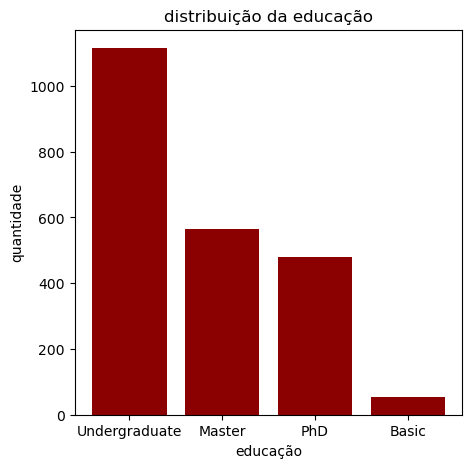

In [19]:
x = df['Education'].value_counts().index
y = df['Education'].value_counts().values

plt.figure(figsize=(5, 5))
plt.bar(x, y, color='darkred')
plt.xlabel('educação')
plt.ylabel('quantidade')
plt.title('distribuição da educação')
plt.show()

A maioria dos clientes possuem formação de nivél superior

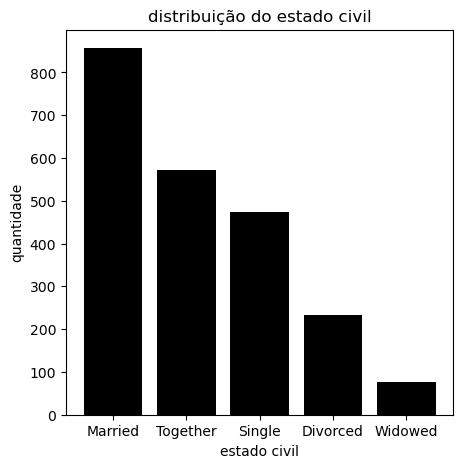

In [21]:
x = df['Marital_Status'].value_counts().index
y = df['Marital_Status'].value_counts().values

plt.figure(figsize=(5, 5))
plt.bar(x, y, color='black')
plt.xlabel('estado civil')
plt.ylabel('quantidade')
plt.title('distribuição do estado civil')
plt.show()

E a maioria dos clientes declarou o estado civil como 'casado'

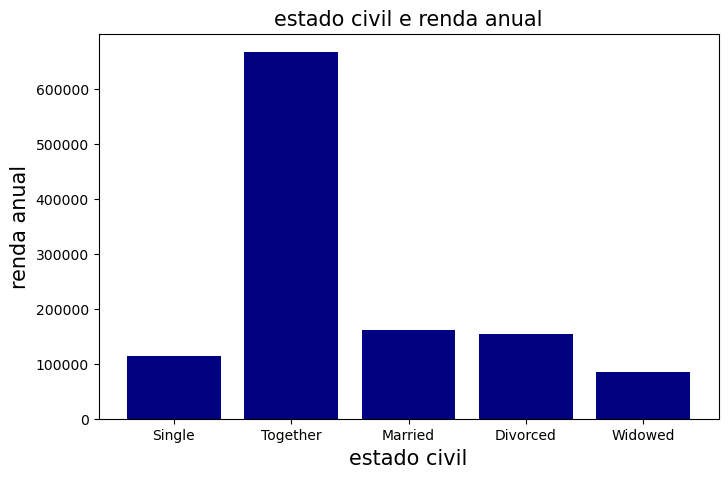

In [23]:
plt.figure(figsize=(8,5))
plt.bar(df['Marital_Status'], df['Income'], color='navy')
plt.title('estado civil e renda anual', fontsize=15)
plt.xlabel('estado civil', fontsize=15)
plt.ylabel('renda anual', fontsize=15)
plt.xticks(rotation=0)
plt.show()

Os clientes que se declararam como 'juntos' são os que possuem uma renda anual maior

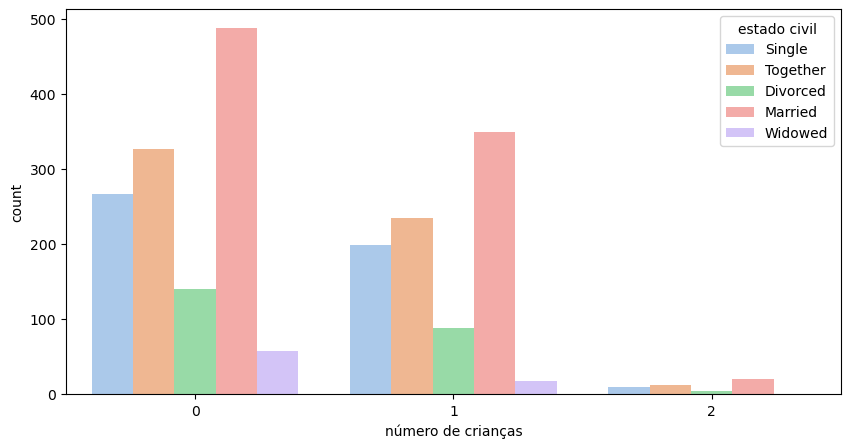

In [25]:
plt.figure(figsize=(10,5))
sns.countplot(x='Kidhome', hue='Marital_Status', data=df, palette='pastel')
plt.xlabel('número de crianças')
plt.legend(title='estado civil')
plt.show()

A maioria dos clientes com o estado civil 'casado' não possuem filhos

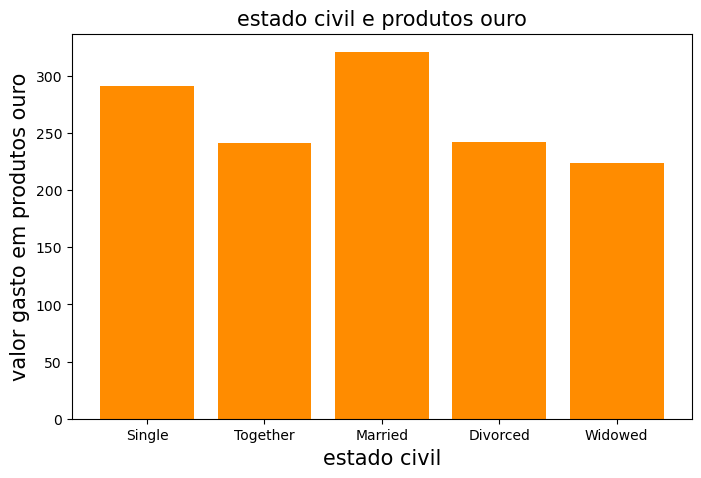

In [27]:
plt.figure(figsize=(8,5))
plt.bar(df['Marital_Status'], df['MntGoldProds'], color='darkorange')
plt.title('estado civil e produtos ouro', fontsize=15)
plt.xlabel('estado civil', fontsize=15)
plt.ylabel('valor gasto em produtos ouro', fontsize=15)
plt.xticks(rotation=0)
plt.show()

Os clientes casados foram os que mais gastaram em produtos ouro na loja

# ETAPA 2:
**Pré-processamento**

**Análise Correlação:** Verifique a correlação entre as váriaveis e análise se há espaço para retirar váriaveis que não te parecem importantes.

**Codificação de Variáveis Categóricas:** Transformar variáveis categóricas em um formato que os modelos de machine learning possam interpretar.


**Separe a base em Y, X e Treino e teste:**: Faça a separação da base.

**Realize a padronização dos dados**: Padronize os dados para garantir eficiência no modelo e eficácia.








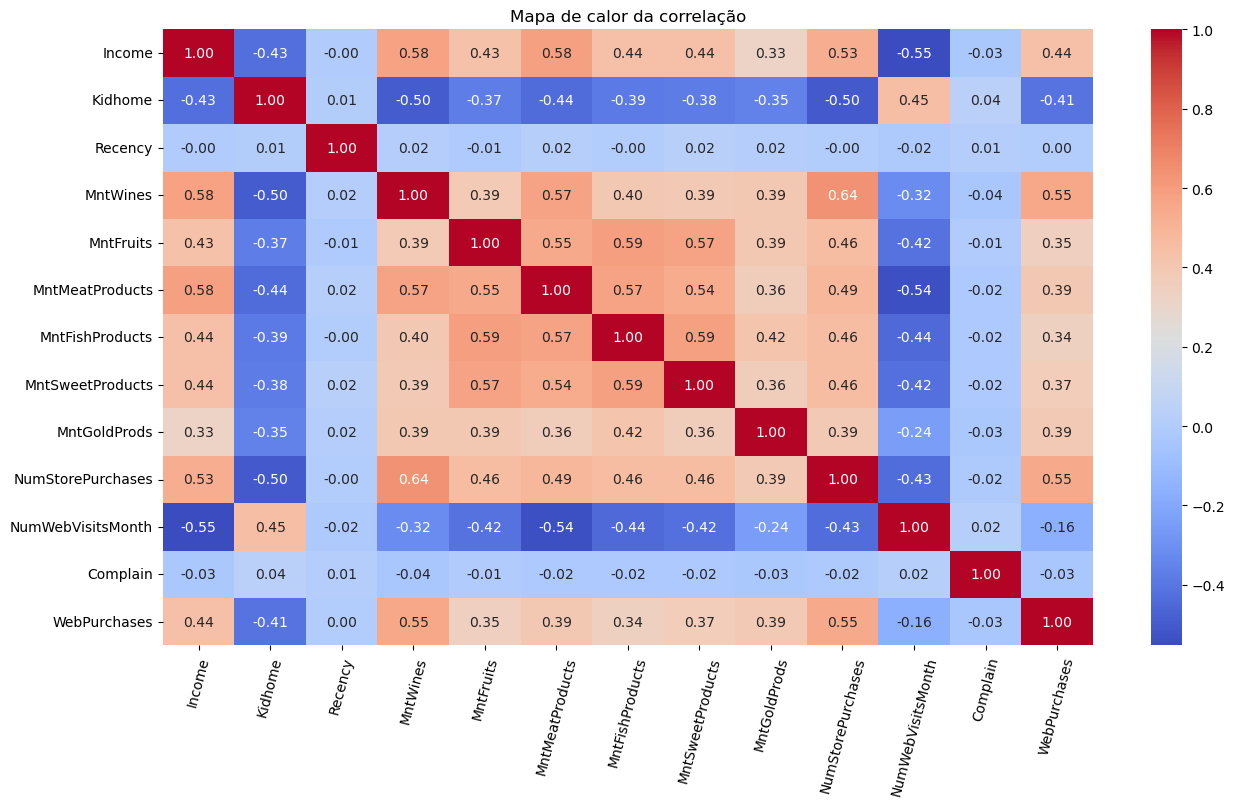

In [30]:
# seu código aqui
df = df.drop(['Year_Birth'], axis=1)                           #exluindo a coluna 'ano de nascimento'

df_correlacao = df.select_dtypes(include=['number']).corr()    #separando as colunas numericas e criando um mapa de calor para a correlação das variaveis
plt.figure(figsize=(15,8))
sns.heatmap(df_correlacao, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size":10})
plt.title('Mapa de calor da correlação')
plt.xticks(rotation=75)
plt.show()

In [31]:
df=pd.get_dummies(df, columns=['Marital_Status', 'Education'])  #aplicando o one hot encoder nas colunas categoricas

for column in df.columns:                                       #transformando as variaveis booleanas em inteiras
    if df[column].dtype == 'bool':
        df[column] = df[column].astype(int)


In [32]:
df.dtypes     #conferindo o tipo dos dados depois da transformação

Income                     float64
Kidhome                      int64
Recency                      int64
MntWines                     int64
MntFruits                    int64
MntMeatProducts              int64
MntFishProducts              int64
MntSweetProducts             int64
MntGoldProds                 int64
NumStorePurchases            int64
NumWebVisitsMonth            int64
Complain                     int64
WebPurchases                 int64
Marital_Status_Divorced      int32
Marital_Status_Married       int32
Marital_Status_Single        int32
Marital_Status_Together      int32
Marital_Status_Widowed       int32
Education_Basic              int32
Education_Master             int32
Education_PhD                int32
Education_Undergraduate      int32
dtype: object

In [33]:
scaler = StandardScaler()                  #padronizando os dados da base
df_padronizado = scaler.fit_transform(df)


In [34]:
x = df.drop('WebPurchases', axis=1) #separando a base entre treino e teste
y = df['WebPurchases']
x_padronizado = x
y_padronizado = y

x_train, x_test, y_train, y_test = train_test_split(x_padronizado, y_padronizado, test_size=0.25, random_state=42)

In [35]:
#conferindo as linhas e colunas da separação de treino e teste
x_train.shape

(1659, 21)

In [36]:
x_test.shape

(553, 21)

In [37]:
y_train.shape

(1659,)

In [38]:
y_test.shape

(553,)

# ETAPA 3:

**Modelagem**

Escolha ao menos 2 técnicas de machine learning e rode 2 modelos, afim de identificar qual tem o melhor resultado para essa base. Lembrando que estamos lidando com uma classificação binária.

In [40]:
# seu código aqui
arvore = DecisionTreeClassifier(criterion='gini', random_state=0)  #iniciando o modelo árvore de decisão
arvore.fit(x_train, y_train)
previsoes_arvore = arvore.predict(x_test)                          #fazendo as previsoes com a árvore de decisao

In [51]:
#criando a grade com os hyperparametros e aplicando o random forest
grid = {
    'n_estimators' : [50, 100, 200, 300],
    'max_features' : ['sqrt', 'log2', None],
    'max_depth' : [None, 10, 20, 30, 40],
    'min_samples_split' : [10, 15, 20],
    'min_samples_leaf': [10, 15, 20],
    'class_weight': [None, 'balanced'],
    'bootstrap': [True, False] }

floresta = RandomForestClassifier(random_state=42)
floresta_grid = RandomizedSearchCV(estimator=floresta, param_distributions=grid, n_iter=100, cv=5, n_jobs=-1, verbose=2, random_state=42, scoring='f1_weighted') #configurando o Randomized.

floresta_grid.fit(x_train, y_train) #executando o Randomized.


Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'class_weight': [None, 'balanced'],
                                        'max_depth': [None, 10, 20, 30, 40],
                                        'max_features': ['sqrt', 'log2', None],
                                        'min_samples_leaf': [10, 15, 20],
                                        'min_samples_split': [10, 15, 20],
                                        'n_estimators': [50, 100, 200, 300]},
                   random_state=42, scoring='f1_weighted', verbose=2)

In [53]:
combinacao = floresta_grid.best_params_                       #obtendo as melhores combinações de hyperparametros no Randomized.
print(combinacao)

{'n_estimators': 100, 'min_samples_split': 20, 'min_samples_leaf': 10, 'max_features': None, 'max_depth': None, 'class_weight': 'balanced', 'bootstrap': True}


In [55]:
melhor_combinacao = floresta_grid.best_estimator_             #aplicando as melhores combinações de hyperparametros no modelo.
previsoes_floresta = melhor_combinacao.predict(x_test)        #fazendo as previsões com os melhores hyperparametros.

# ETAPA 4:

**Avaliação**

Avalie os resultados encontrados nos dois modelos e identifique qual te pareceu realizar melhor as previsões.

Utilize além das métricas padrões a matriz de confusão.

In [43]:
# seu código aqui
relatorio_arvore = classification_report(y_test, previsoes_arvore)    #criando o relatorio de metricas da árvore de decisão
print(relatorio_arvore)

              precision    recall  f1-score   support

           0       0.88      0.86      0.87       289
           1       0.85      0.87      0.86       264

    accuracy                           0.86       553
   macro avg       0.86      0.86      0.86       553
weighted avg       0.86      0.86      0.86       553



In [45]:
matriz_arvore = confusion_matrix(y_test, previsoes_arvore)  #criando a matriz de confusão da árvore de decisão
matriz_arvore

array([[248,  41],
       [ 34, 230]], dtype=int64)

In [57]:
relatorio_floresta = classification_report(y_test, previsoes_floresta)    #criando o relatorio de metricas do random forest
print(relatorio_floresta)

              precision    recall  f1-score   support

           0       0.94      0.85      0.89       289
           1       0.85      0.94      0.90       264

    accuracy                           0.90       553
   macro avg       0.90      0.90      0.90       553
weighted avg       0.90      0.90      0.90       553



In [59]:
matriz_floresta = confusion_matrix(y_test, previsoes_floresta)  #criando a matriz de confusão do random forest
matriz_floresta

array([[246,  43],
       [ 15, 249]], dtype=int64)

R - Para a previsão dessa base de dados eu escolhi usar a árvore de decisão e o random forest, na árvore de decisão o desempenho foi bom, o modelo teve um f1-score de 0.87 na variável '0' e 0.86 na variável '1' e uma acuracia de 0.86, na matriz de confusão da árvore podemos ver que o modelo acertou 248 e errou 41 nos verdadeiro positivo e acertou 230 mas errou 34 no verdadeiro negativo.
No random forest eu tunei o modelo com o randomized search e o resultado foi bem melhor que a árvore de decisão, o f1-score foi de 0.89 na variável '0' e 0.90 na variável '1', a acuracia foi de 0.90 e na matriz de confusão o random forest acertou 246 verdadeiro positivo e errou 43, no verdadeiro negativo ele acertou 249 e errou 15. 